`PPO Vanilla Implementation`
source: https://github.com/ericyangyu/PPO-for-Beginners

In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Go to the shared DRL_Project folder, right click, organize add shortcut, all locations, My Drive
folder_path = "/content/drive/My Drive/DRL_Project/Project_Files/"
%cd /content/drive/MyDrive/DRL_Project/Project_Files

/content/drive/.shortcut-targets-by-id/1kb8rBN3nL6jUcWMCUvqWRiXHKTUESTJ4/DRL_Project/Project_Files


In [3]:
%pip install -r requirements.txt "gym[atari, accept-rom-license]"

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%pip install "gymnasium[mujoco]"

In [6]:
# import gymnasium as gym
import gym
import sys
import torch
import torch.nn as nn

from arguments import get_args
from ppo_attn import PPO
from network_attn import FeedForwardNN
from eval_policy import eval_policy

In [7]:
class DictObject:
    def __init__(self, d=None):
        if d is not None:
            for key, value in d.items():
                setattr(self, key, value)


In [8]:
def train(timesteps, env, hyperparameters):
	print(f"Training starting...", flush=True)

	model = PPO(env=env, **hyperparameters)
	metadata = model.learn(total_timesteps=timesteps)

	return metadata


In [9]:
def main(args):
	hyperparameters = {
		'timesteps_per_batch': 2048,
		'max_timesteps_per_episode': 200,
		'gamma': 0.99,
		'n_updates_per_iteration': 10,
		'lr': 3e-4,
		'clip': 0.2,
		'render': False,
		'render_every_i': 10,
		'actor_save_path': f"'{args.actor_save_path}'",
		'critic_save_path': f"'{args.critic_save_path}'",
		'use_checkpoints': args.use_checkpoints
	}

	env = gym.make(args.env, render_mode='rgb_array')

	metadata = train(timesteps=args.timesteps, env=env, hyperparameters=hyperparameters)
	return metadata

In [10]:
import matplotlib.pyplot as plt
def graph_metadata(metadata):
  timesteps = [entry['timesteps'] for entry in metadata]
  avg_rewards = [entry['average_episode_rewards'] for entry in metadata]
  avg_loss = [entry['avg_actor_loss'] for entry in metadata]


  plt.figure(figsize=(8, 6))
  plt.plot(timesteps, avg_rewards, marker='o', linestyle='-', label='Average Episode Reward')
  plt.title("Average Episode Reward vs. Timesteps")
  plt.xlabel("Timesteps")
  plt.ylabel("Average Episode Reward")
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(8, 6))
  plt.plot(timesteps, avg_loss, marker='o', linestyle='-', color='r', label='Average Actor Loss')
  plt.title("Average Actor Loss vs. Timesteps")
  plt.xlabel("Timesteps")
  plt.ylabel("Average Actor Loss")
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()


Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 20000.0 timesteps
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_critic.pth


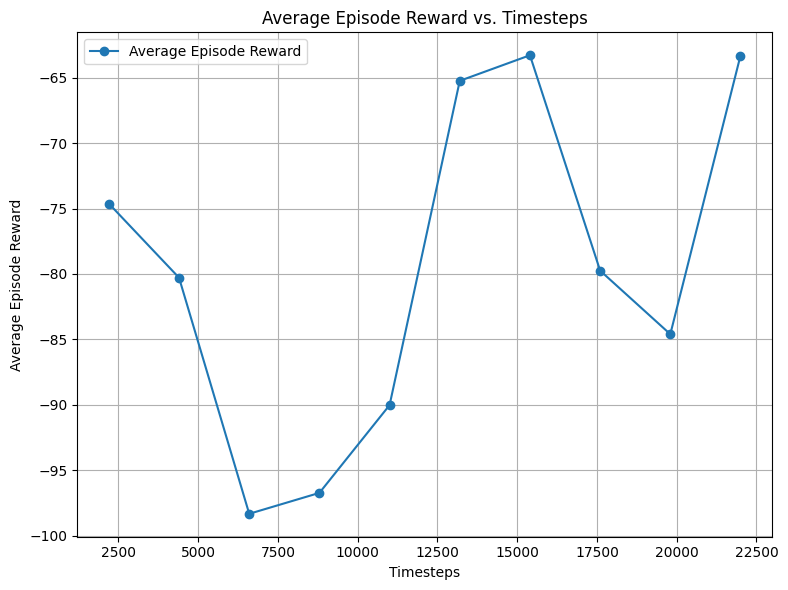

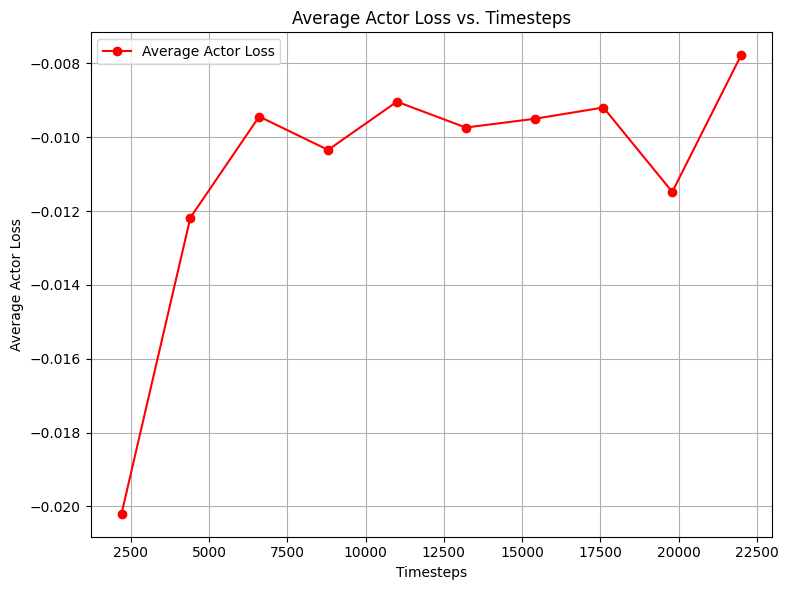

In [ ]:
# ## TRAINING ON HALF-CHEETAH TO MAKE SURE CODE WORKS AS INTENDED
# args = {
#     'env': 'HalfCheetah-v4',
#     'actor_save_path': folder_path + 'HalfCheetah_ppo_actor.pth',
#     'critic_save_path': folder_path + 'HalfCheetah_ppo_critic.pth',
#     'use_checkpoints': False,
#     'timesteps': 2e4 #20000
# }

# args = DictObject(args)
# cheetah_metadata = main(args)
# graph_metadata(cheetah_metadata)

In [ ]:
# environments = {
#     "HalfCheetah": (17, 6, "HalfCheetah-v4"),
#     "Hopper": (11, 3, "Hopper-v4"),
#     "InvertedDoublePendulum":(9, 1, "InvertedDoublePendulum-v4"),
#     "InvertedPendulum":(4, 1, "InvertedPendulum-v4"),
#     "Reacher":(10, 2, "Reacher-v4"),
#     "Swimmer":(8, 2, "Swimmer-v4"),
#     "Walker2d":(17, 6, "Walker2d-v4"),
# }

# env_args = {}
# for env_name, (obs_dim, action_dim, env_version) in environments.items():
#     args = {
#         'env': env_version,
#         'actor_save_path': f'{folder_path}{env_name}_ppo_actor.pth',
#         'critic_save_path': f'{folder_path}{env_name}_ppo_critic.pth',
#         'use_checkpoints': False,
#         'timesteps': 1e6 #1 million
#     }

#     env_args[env_name] = DictObject(args)

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 1000000.0 timesteps
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_critic.pth
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/HalfCheetah_ppo_critic.pth
Saved m

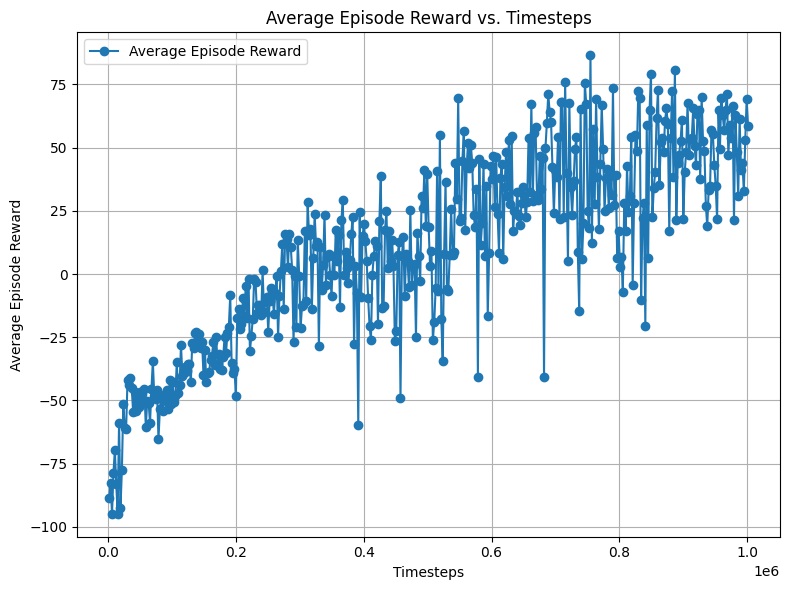

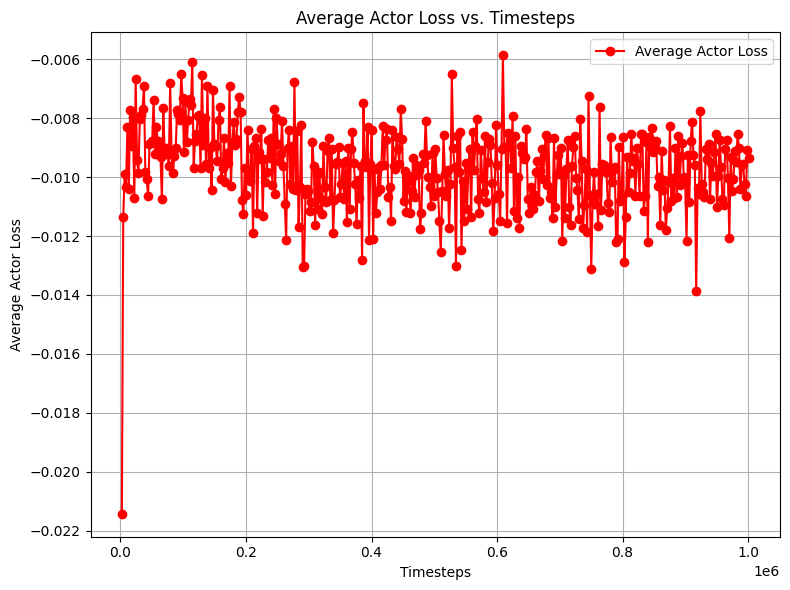

In [ ]:
# args = env_args["HalfCheetah"]
# metadata = main(args)
# graph_metadata(metadata)
# # self-attn

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 20000.0 timesteps
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_critic.pth


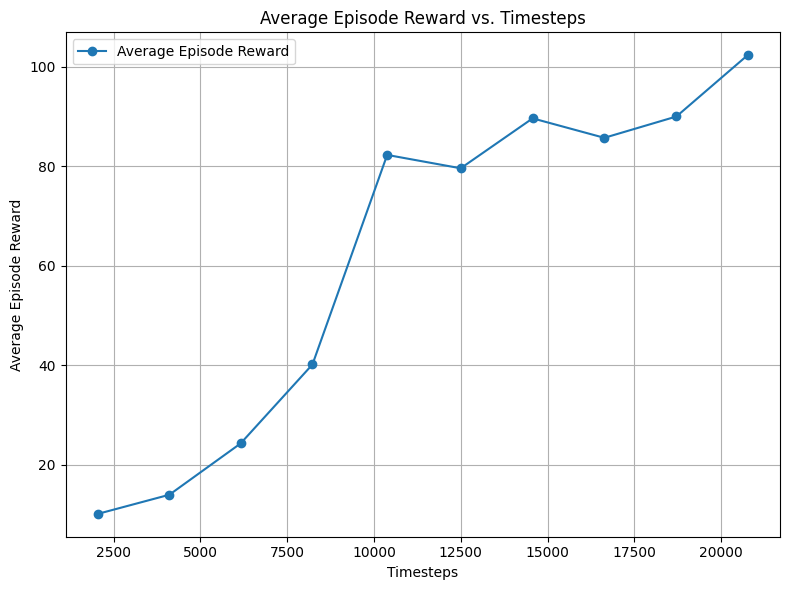

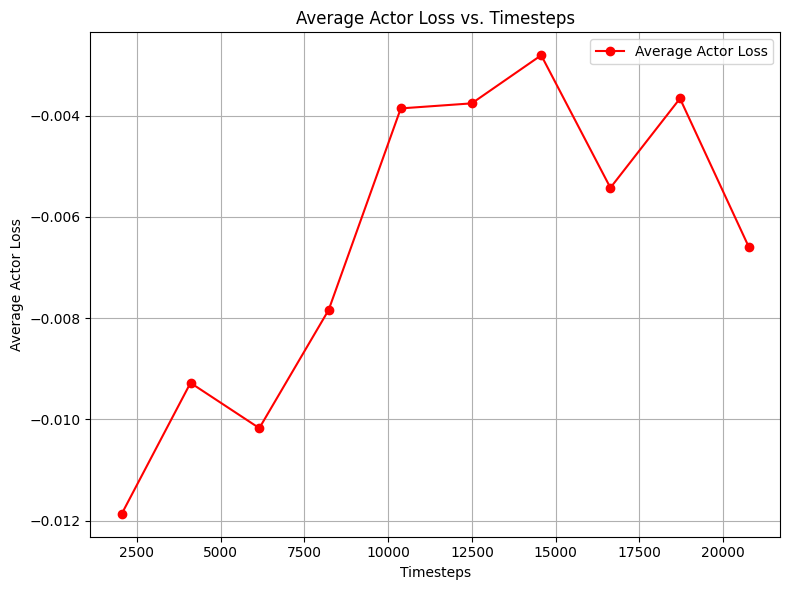

In [ ]:
# args = env_args["Hopper"]
# metadata = main(args)
# graph_metadata(metadata)

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 20000.0 timesteps
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/Hopper_ppo_critic.pth


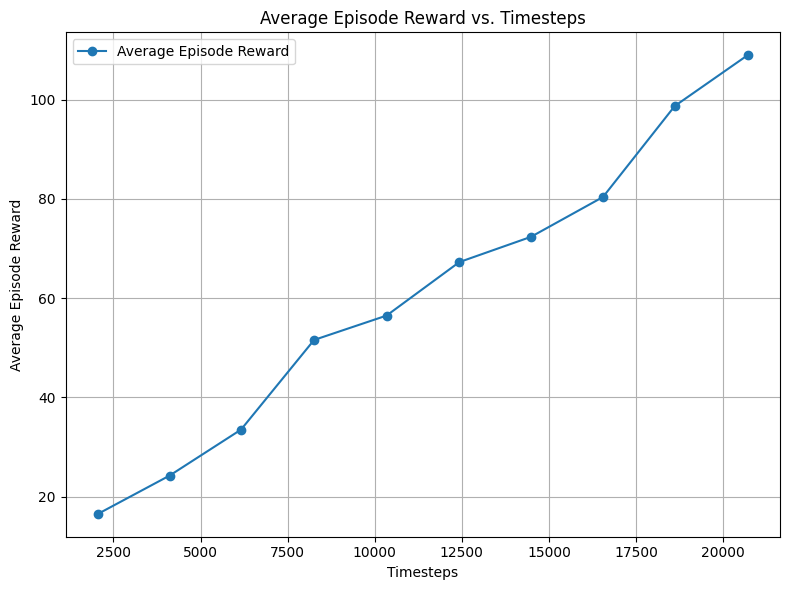

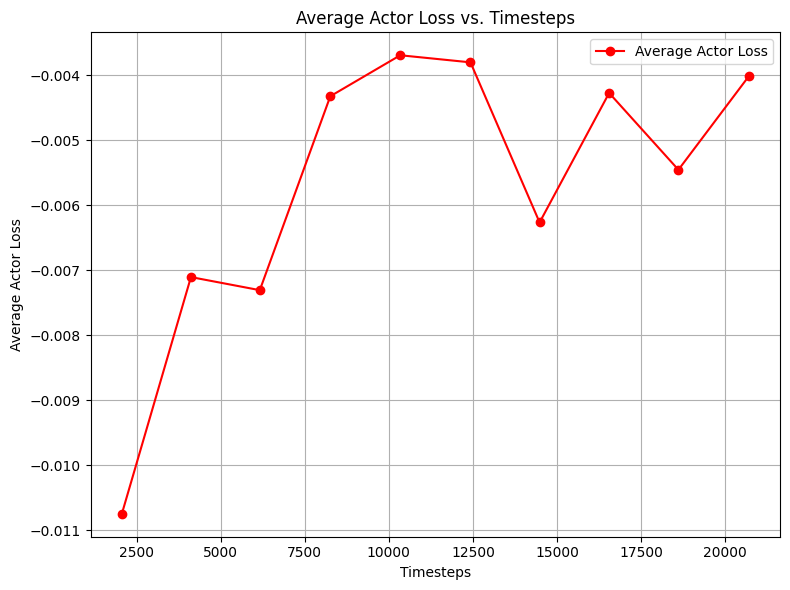

In [ ]:
# args = env_args["Hopper"]
# metadata = main(args)
# graph_metadata(metadata)

# self.attn

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 20000.0 timesteps
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/InvertedDoublePendulum_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/InvertedDoublePendulum_ppo_critic.pth


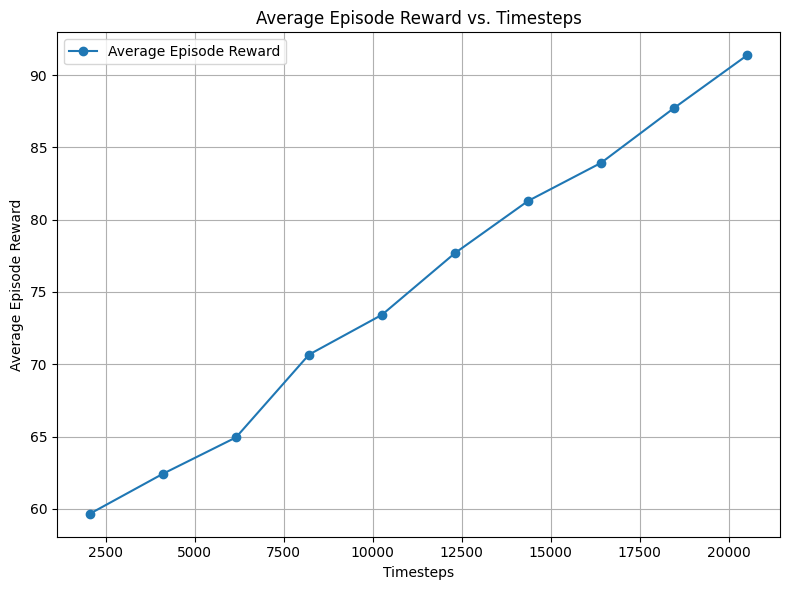

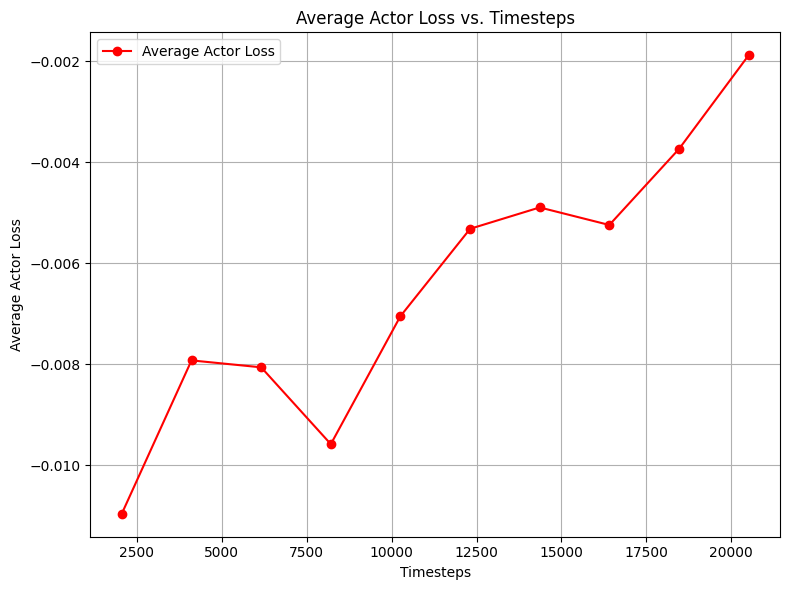

In [ ]:
# args = env_args["InvertedDoublePendulum"]
# metadata = main(args)
# graph_metadata(metadata)

In [ ]:
# args = env_args["InvertedDoublePendulum"]
# metadata = main(args)
# graph_metadata(metadata)
# # self-attn

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 20000.0 timesteps
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/InvertedPendulum_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/InvertedPendulum_ppo_critic.pth


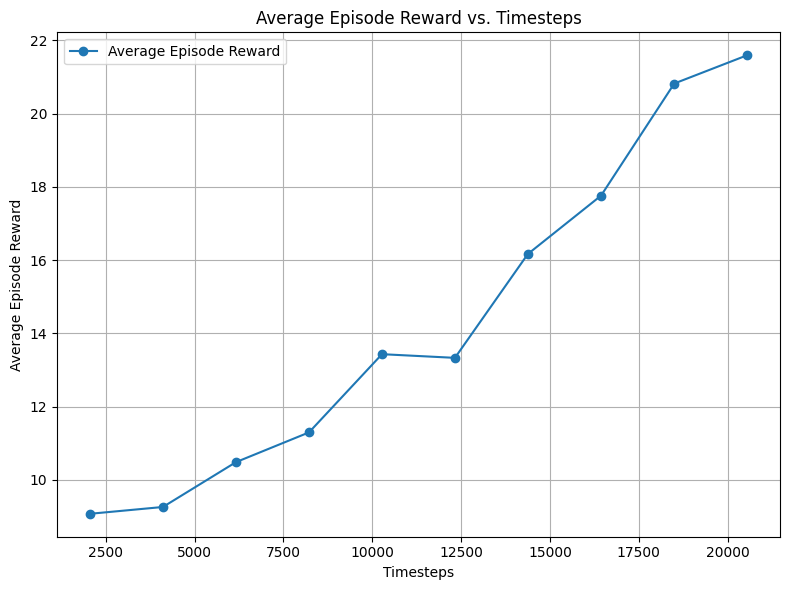

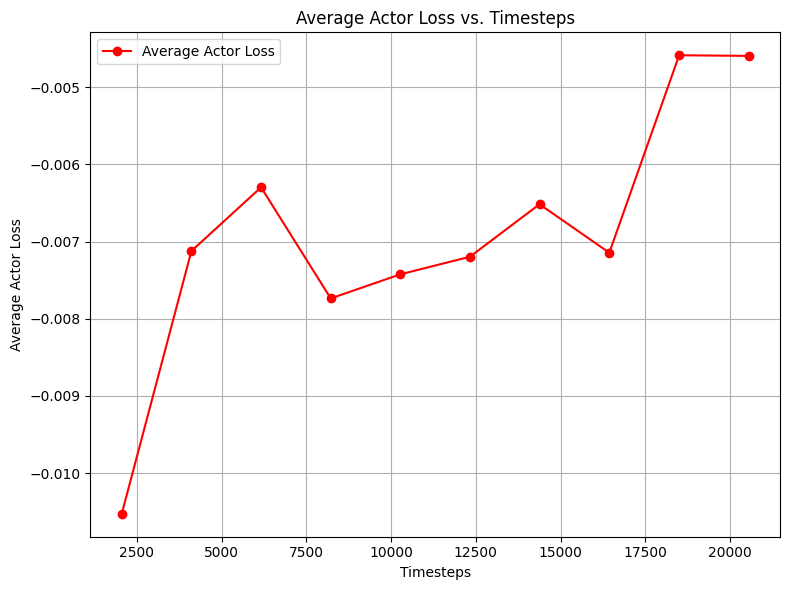

In [ ]:
# args = env_args["InvertedPendulum"]
# metadata = main(args)
# graph_metadata(metadata)

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 20000.0 timesteps
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/Reacher_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/Reacher_ppo_critic.pth


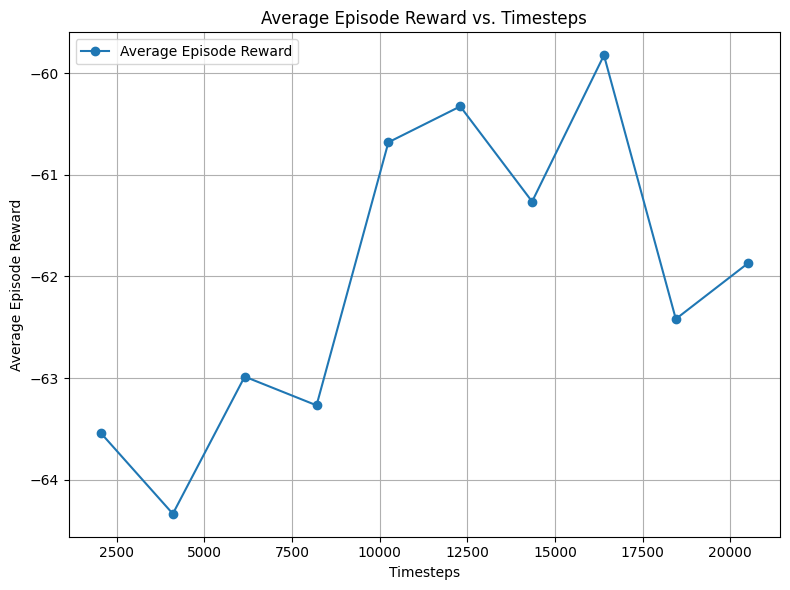

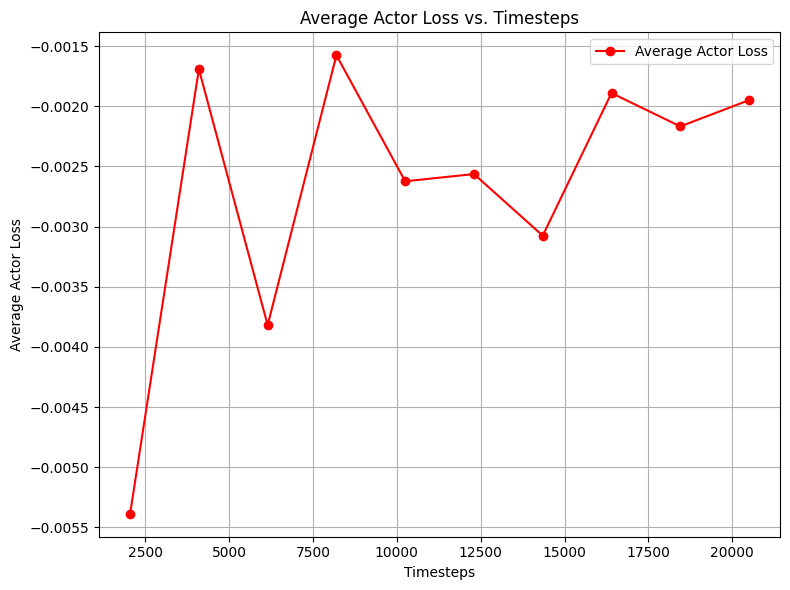

In [ ]:
# args = env_args["Reacher"]
# metadata = main(args)
# graph_metadata(metadata)

In [ ]:
# args = env_args["Swimmer"]
# metadata = main(args)
# metadata

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 20000.0 timesteps
Saved models to /content/drive/My Drive/DRL_Project/Project_Files/Walker2d_ppo_actor.pth and /content/drive/My Drive/DRL_Project/Project_Files/Walker2d_ppo_critic.pth


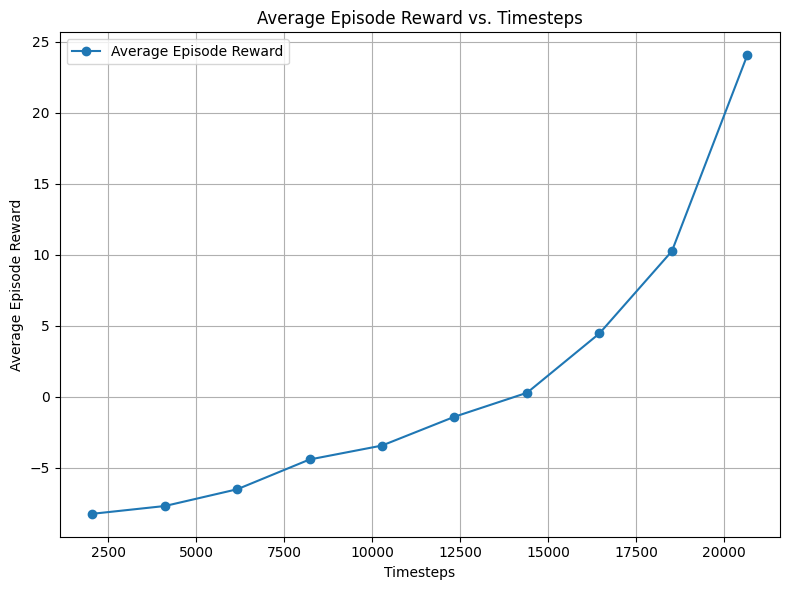

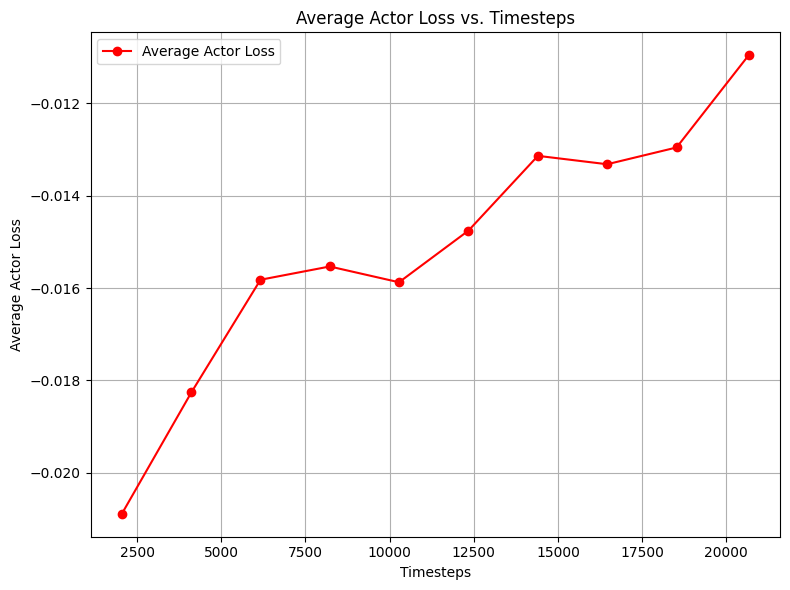

In [ ]:
# args = env_args["Walker2d"]
# metadata = main(args)
# graph_metadata(metadata)

In [ ]:
# !pip install "gym[atari, accept-rom-license]"

In [ ]:
# from gym.wrappers import FrameStack, AtariPreprocessing
# import gym

# def make_atari_env(env_id):
# 	env = gym.make(env_id)
# 	# env = AtariPreprocessing(env, grayscale_obs=True, scale_obs=False, frame_skip=4)
# 	env = FrameStack(env, 4)
# 	return env

# env = make_atari_env("ALE/Tutankham-v5")

# agent = PPO(env, actor_save_path='ppo_actor.pth', critic_save_path='ppo_critic.pth', render=False)
# agent.learn(total_timesteps=10_000)

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 20000.0 timesteps


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Saved models to Tutankham_ppo_actor.pth and Tutankham_ppo_critic.pth


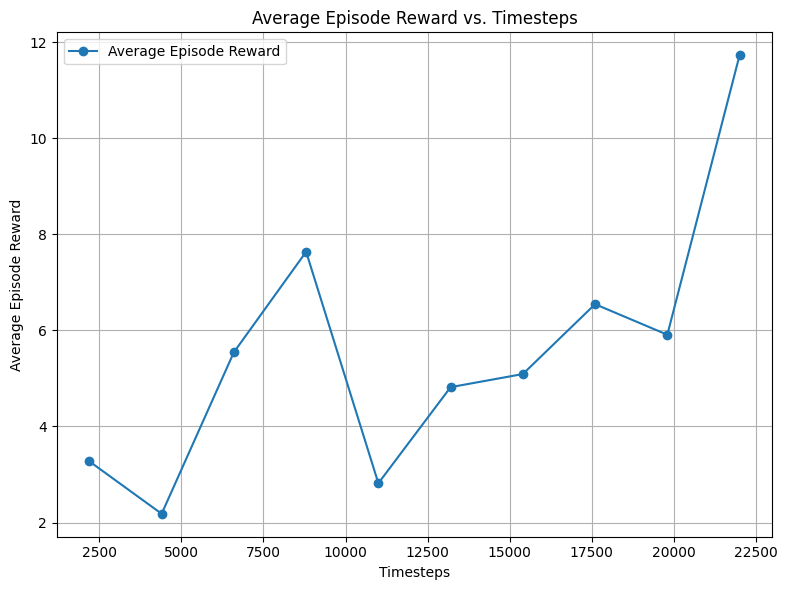

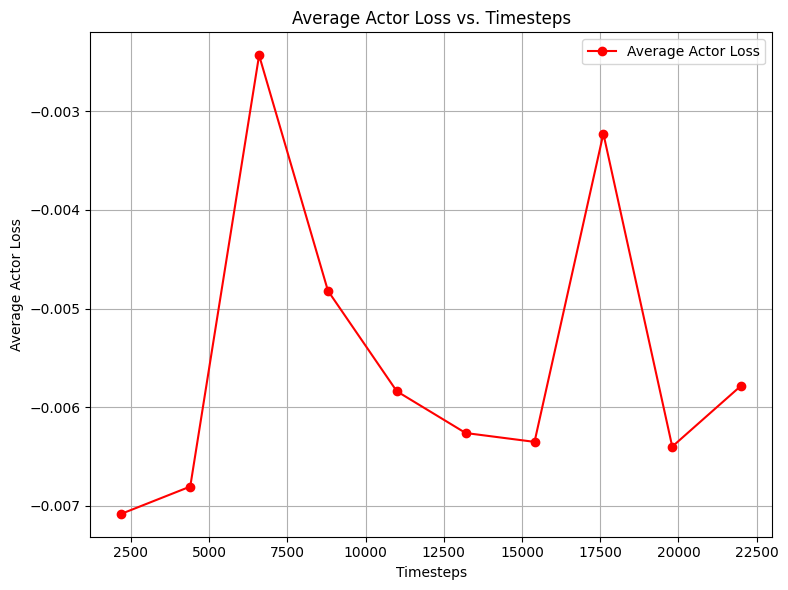

In [ ]:
## TRAINING ON HALF-CHEETAH TO MAKE SURE CODE WORKS AS INTENDED
## Self-attention
args = {
    'env': 'ALE/Tutankham-v5',
    'actor_save_path': 'Tutankham_ppo_actor.pth',
    'critic_save_path': 'Tutankham_ppo_critic.pth',
    'use_checkpoints': False,
    'timesteps': 2e4 #20000
}

args = DictObject(args)
tutankham_metadata = main(args)
graph_metadata(tutankham_metadata)

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 600000.0 timesteps


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo_critic_wo_attn.pth
Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo_critic_wo_attn.pth
Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo_critic_wo_attn.pth
Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo_critic_wo_attn.pth
Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo_critic_wo_attn.pth
Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo_critic_wo_attn.pth
Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo_critic_wo_attn.pth
Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo_critic_wo_attn.pth
Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo_critic_wo_attn.pth
Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo_critic_wo_attn.pth
Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo_critic_wo_attn.pth
Saved models to Tutankham_ppo_actor_wo_attn.pth and Tutankham_ppo

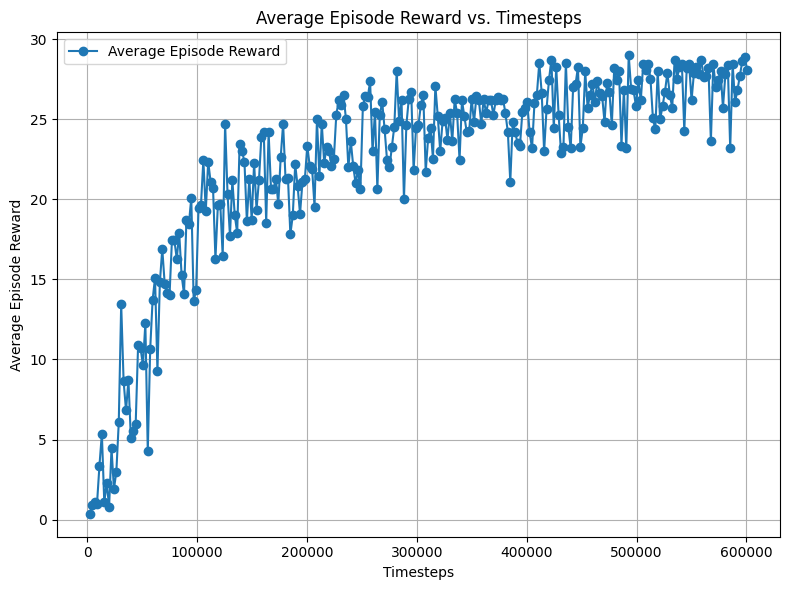

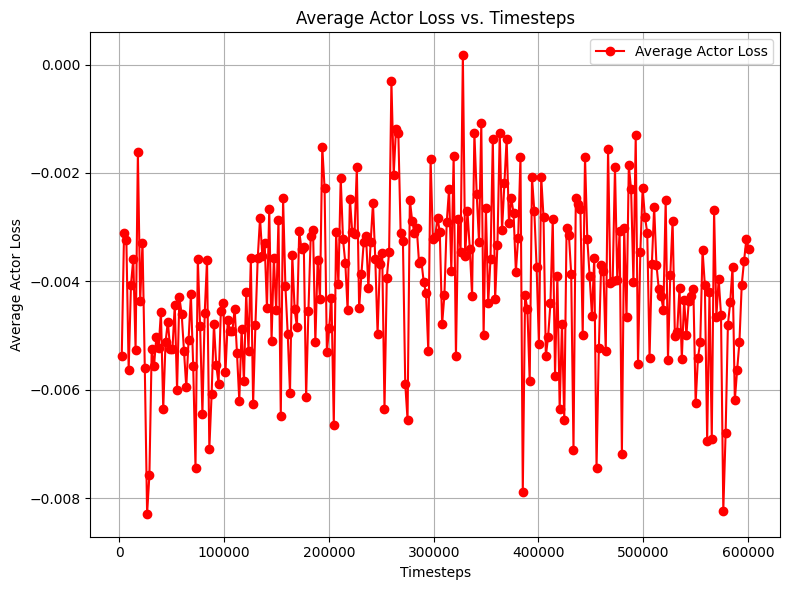

In [ ]:
## TRAINING ON HALF-CHEETAH TO MAKE SURE CODE WORKS AS INTENDED
## without self-attention

args = {
    'env': 'ALE/Tutankham-v5',
    'actor_save_path': 'Tutankham_ppo_actor_wo_attn.pth',
    'critic_save_path': 'Tutankham_ppo_critic_wo_attn.pth',
    'use_checkpoints': True,
    'timesteps': 6e5 #600,000
}

args = DictObject(args)
tutankham_metadata = main(args)
graph_metadata(tutankham_metadata)

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 600000.0 timesteps


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tutankham_ppo_critic_attn.pth
Saved models to Tutankham_ppo_actor_attn.pth and Tut

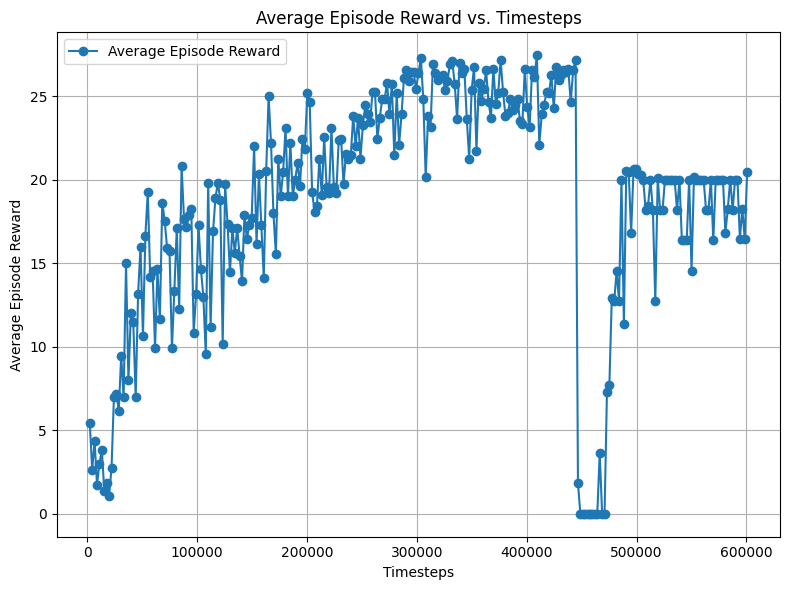

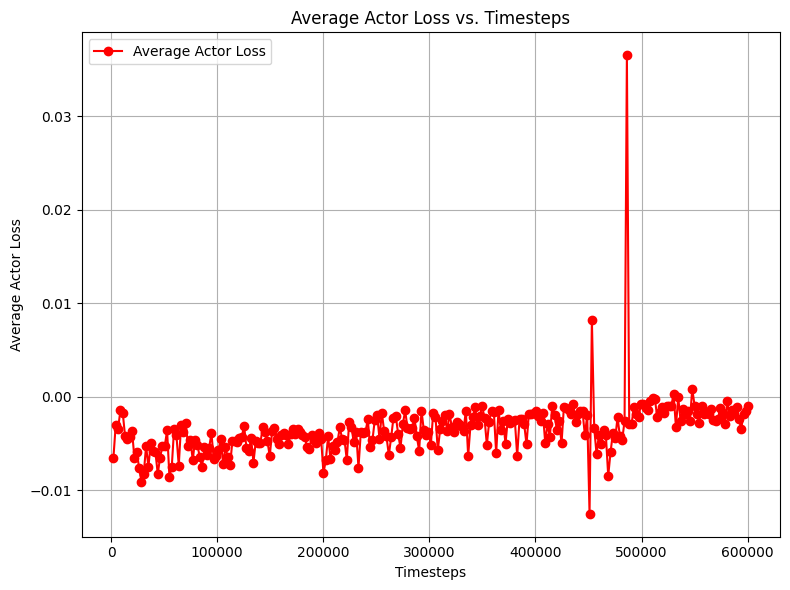

In [10]:
## TRAINING ON HALF-CHEETAH TO MAKE SURE CODE WORKS AS INTENDED
## with self-attention

args = {
    'env': 'ALE/Tutankham-v5',
    'actor_save_path': 'Tutankham_ppo_actor_attn.pth',
    'critic_save_path': 'Tutankham_ppo_critic_attn.pth',
    'use_checkpoints': False,
    'timesteps': 6e5 #600,000
}

args = DictObject(args)
tutankham_metadata = main(args)
graph_metadata(tutankham_metadata)

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 600000.0 timesteps
Saved models to Tutankham_ppo_actor_act.pth and Tutankham_ppo_critic_act.pth
Saved models to Tutankham_ppo_actor_act.pth and Tutankham_ppo_critic_act.pth
Saved models to Tutankham_ppo_actor_act.pth and Tutankham_ppo_critic_act.pth
Saved models to Tutankham_ppo_actor_act.pth and Tutankham_ppo_critic_act.pth
Saved models to Tutankham_ppo_actor_act.pth and Tutankham_ppo_critic_act.pth
Saved models to Tutankham_ppo_actor_act.pth and Tutankham_ppo_critic_act.pth
Saved models to Tutankham_ppo_actor_act.pth and Tutankham_ppo_critic_act.pth
Saved models to Tutankham_ppo_actor_act.pth and Tutankham_ppo_critic_act.pth
Saved models to Tutankham_ppo_actor_act.pth and Tutankham_ppo_critic_act.pth
Saved models to Tutankham_ppo_actor_act.pth and Tutankham_ppo_critic_act.pth
Saved models to Tutankham_ppo_actor_act.pth and Tutankham_ppo_critic_act.pth
Saved models to Tutankham_

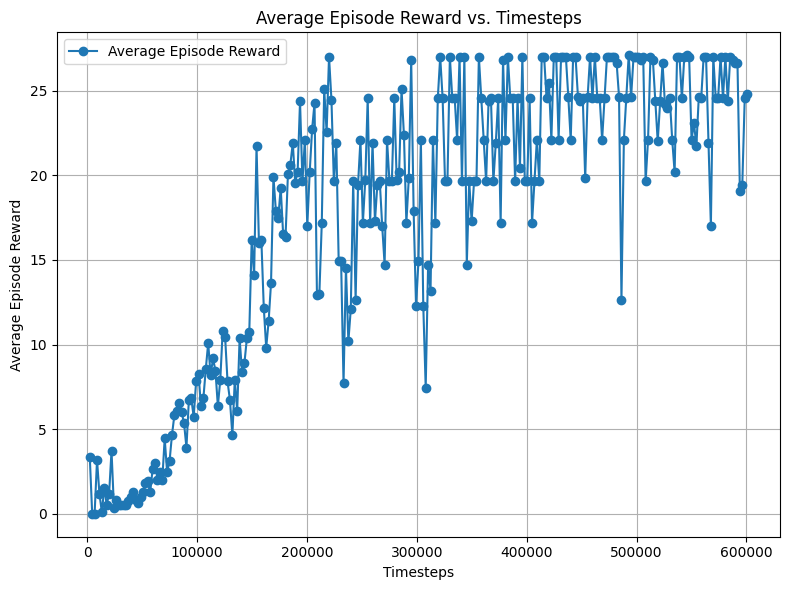

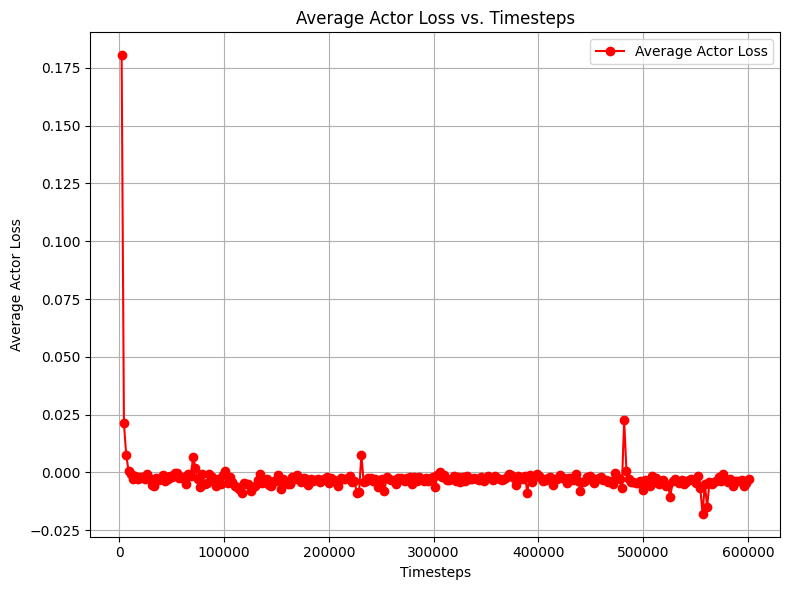

In [13]:
## TRAINING ON HALF-CHEETAH TO MAKE SURE CODE WORKS AS INTENDED
## with self-attention

args = {
    'env': 'ALE/Tutankham-v5',
    'actor_save_path': 'Tutankham_ppo_actor_act.pth',
    'critic_save_path': 'Tutankham_ppo_critic_act.pth',
    'use_checkpoints': False,
    'timesteps': 6e5 #600,000
}

args = DictObject(args)
tutankham_metadata = main(args)
graph_metadata(tutankham_metadata)

In [18]:
from custom_ppo import PPO

In [25]:
## TRAINING ON HALF-CHEETAH TO MAKE SURE CODE WORKS AS INTENDED
args = {
    'env': 'HalfCheetah-v4',
    'actor_save_path': folder_path + 'HalfCheetah_ppo_actor_attn.pth',
    'critic_save_path': folder_path + 'HalfCheetah_ppo_critic_attn.pth',
    'use_checkpoints': False,
    'timesteps': 6e5
}

args = DictObject(args)
cheetah_metadata = main(args)
graph_metadata(cheetah_metadata)

Training starting...
Learning... Running 200 timesteps per episode, 2048 timesteps per batch for a total of 600000.0 timesteps


ValueError: Action dimension mismatch